# Tutorial 8

## Customer Segmentation Using K mean Clustering

- Data Set : The data set used it from https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python. It is a Mall Customer Segmentation Data.
- Problem Statement : You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.
- Inspiration :
By the end of this case study , you would be able to answer below questions.
 - How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way.
 - Who are your target customers with whom you can start marketing strategy [easy to converse]
 - How the marketing strategy works in real world.
- The most common ways businesses segement their customers are Demographic information,Geographical information,Psychographics and Behavioral data

### K means refresher 

- Specify number of clusters K.
- Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
- Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

### Loading Libraries 

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data set

In [57]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Data has following features
- Customer ID : Unique ID assigned to the customer
- Gender : Gender of the customer
- Age : Age of the customer
- Annual Income : Annual Income of the customer
- Spending Score (1-100) : Score assigned by the mall based on customer behavior and spending nature.

In [58]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


I will drop the Customer ID since it is not relevent for our problem


In [59]:
df.drop(["CustomerID"], axis = 1, inplace=True)

Next I will plot the age frequency of the customers


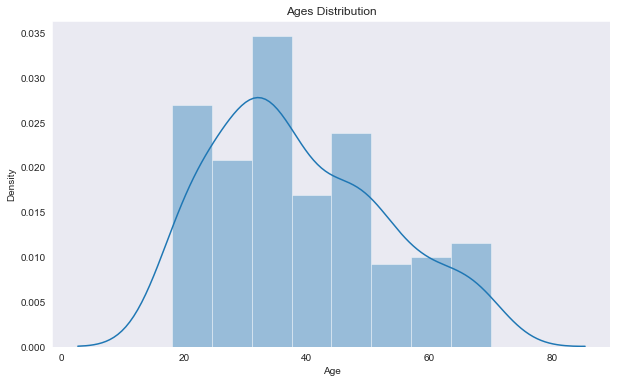

In [60]:
plt.figure(figsize=(10,6))
plt.title("Ages Distribution")
sns.axes_style("dark")
sns.distplot(df["Age"])
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

- The ages of customer are in range from 20 - 70 years.
- Most of them belong to young and adults group.
- Over all the Age distribution is approximately  Normal distrbution.

Next I made a box plot of spending score and annual income to better visualize the distribution range.

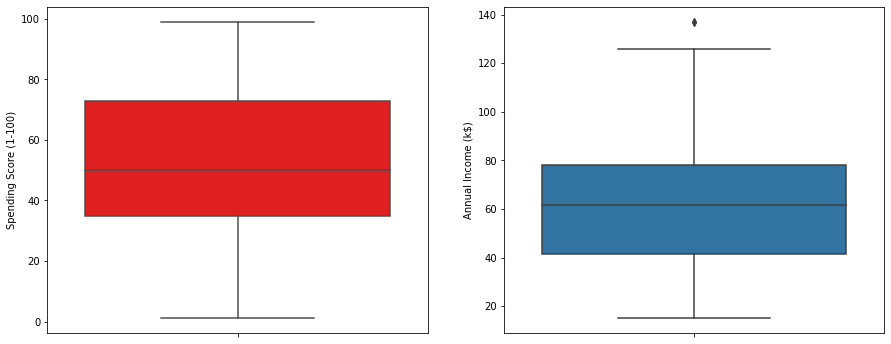

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

plt.subplot takes the three
    integers are *nrows*, *ncols*, and *index* in order, the
    subplot will take the *index* position on a grid with *nrows* as 
    rows and *ncols* as columns.

Next I make bar plots to visualize Gender Distribution  

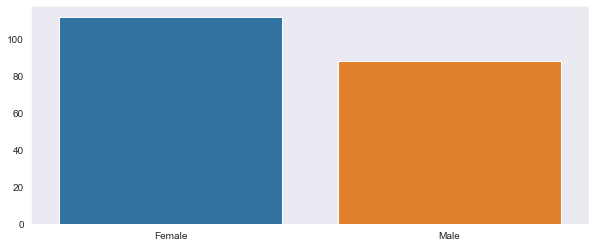

In [26]:
genders = df.Gender.value_counts()
sns.set_style("dark")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

We can clearly visualize that Female population clearly outweighs the Male population.

In [61]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [63]:
#change Gender data type to category
df["Gender"] = df["Gender"].astype("category")
#do categorical encoding of the column
df["Gender"] = df["Gender"].cat.codes

In [64]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Next I made a bar plot to check the distribution of number of customers in each age group.

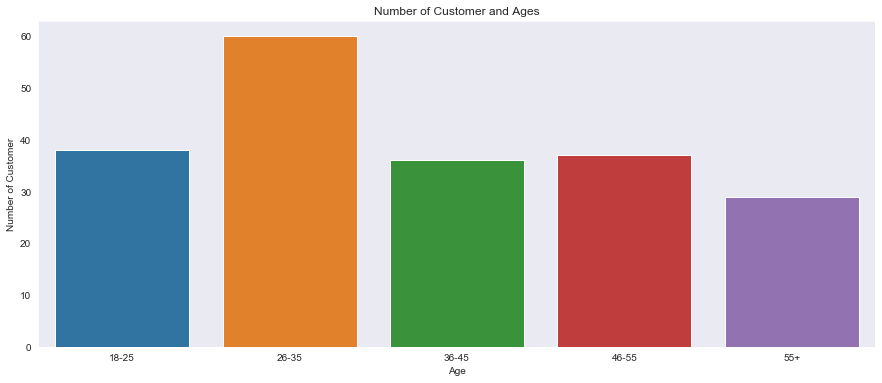

In [33]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y)
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

In [37]:
len(age18_25.values)

array([19, 21, 20, 23, 22, 23, 24, 22, 20, 25, 23, 21, 18, 21, 20, 24, 24,
       19, 18, 19, 23, 21, 22, 18, 24, 20, 23, 21, 19, 19, 18, 19, 23, 25,
       20, 19, 25, 19], dtype=int64)

- Next I plotted Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. WCSS measures sum of distances of observations from their cluster centroids which is given by the below formula :

<h3 align="center">$ \ {WCSS} = \sum \limits (X_{i} - Y_{i})^2 $</h3> 

- where Yi is centroid for observation Xi. The main goal is to maximize number of clusters and in limiting case each data point becomes its own cluster centroid.

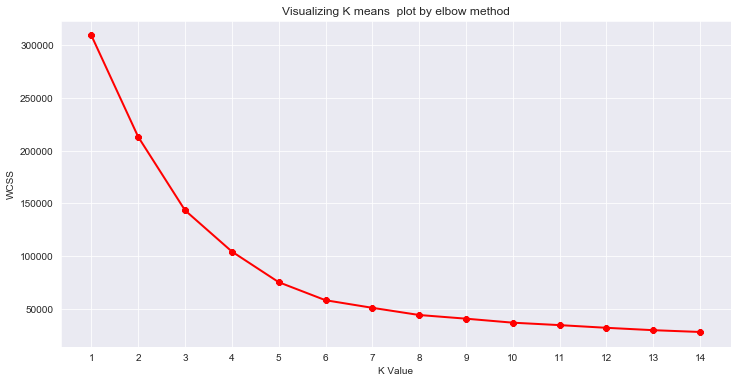

In [78]:
from sklearn.cluster import KMeans
#make empty list
wcss = []
#loop from 1 to 14 that is from k = 1 to k = 14. This means that the algorithm will run 14 times.
for k in range(1,15):
    #intialize the algorithm. First for k = 1 
    kmeans = KMeans(n_clusters=k,algorithm = "full")
    #fit the algorithm 
    kmeans.fit(df)
    # inertia : Sum of squared distances of samples to their closest cluster center 
    #which we defined as wcss in formula
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,15),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("WCSS")
plt.title("Visualizing K means  plot by elbow method")
plt.show()

### The Elbow Method
 
- Calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS first starts to diminish. In the plot of WSS-versus k, this is visible as an elbow.

- The optimal K value is found to be  using the elbow method.

In [72]:
kmeans.cluster_centers_

array([[  0.33333333,  36.75      ,  25.25      ,  27.58333333],
       [  0.33333333,  23.        ,  63.27777778,  46.44444444],
       [  0.42857143,  32.78571429,  77.78571429,  73.28571429],
       [  0.52941176,  48.        ,  80.70588235,  18.        ],
       [  0.4       ,  24.85      ,  24.95      ,  81.        ],
       [  0.57142857,  64.38095238,  53.33333333,  50.23809524],
       [  0.4       ,  32.2       , 109.7       ,  82.        ],
       [  0.3       ,  41.        , 109.7       ,  22.        ],
       [  1.        ,  27.14285714,  78.28571429,   6.28571429],
       [  0.36842105,  44.78947368,  61.89473684,  48.63157895],
       [  0.30769231,  48.84615385,  46.38461538,  46.76923077],
       [  0.4       ,  26.86666667,  43.66666667,  54.26666667],
       [  0.44444444,  54.        ,  25.        ,   8.77777778],
       [  0.53333333,  32.93333333,  79.26666667,  90.46666667]])

In [73]:
kmeans.inertia_

27690.136047698445

In [74]:
kmeans.labels_

array([ 0,  4,  0,  4,  0,  4, 12,  4, 12,  4, 12,  4, 12,  4,  0,  4,  0,
        4,  0,  4,  0,  4, 12,  4, 12,  4,  0, 11,  0,  4, 12,  4, 12,  4,
       12,  4,  0,  4,  0,  4,  5,  4, 10, 11,  0, 11, 10, 11, 11, 11, 10,
       11, 11,  5, 10, 10, 10,  5, 11, 10,  5, 11,  5, 10,  5, 11, 10,  5,
       11, 11,  5, 10,  5,  5,  5, 11,  9,  9,  1, 10,  5,  9,  5, 10, 11,
       10,  5,  1,  9,  9,  5,  1,  9,  9,  1,  1,  9,  1,  9,  1,  1,  9,
        5,  1,  9,  1,  5,  9,  5,  5,  5,  1,  9,  1,  1,  1,  5,  9,  9,
        9,  1,  9,  9, 13,  1,  2,  9, 13,  3,  2,  3,  2,  1,  2,  8, 13,
        3,  2,  8,  2,  3, 13,  1, 13,  8, 13,  3,  2,  3, 13,  3, 13,  3,
        2,  3, 13,  8,  2,  8,  2,  3, 13,  8, 13,  3,  2,  3, 13,  3,  2,
        3,  2,  8, 13,  3, 13,  3,  2,  3, 13,  7,  6,  7,  6,  7,  6,  7,
        6,  7,  6,  7,  6,  7,  6,  7,  6,  7,  6,  7,  6])

In [80]:
kmeans

KMeans(algorithm='full', n_clusters=14)

- Finally I made a 3D plot to visualize the spending score of the customers with their annual income. The data points are separated into 5 classes which are represented in different colours as shown in the 3D plot. 

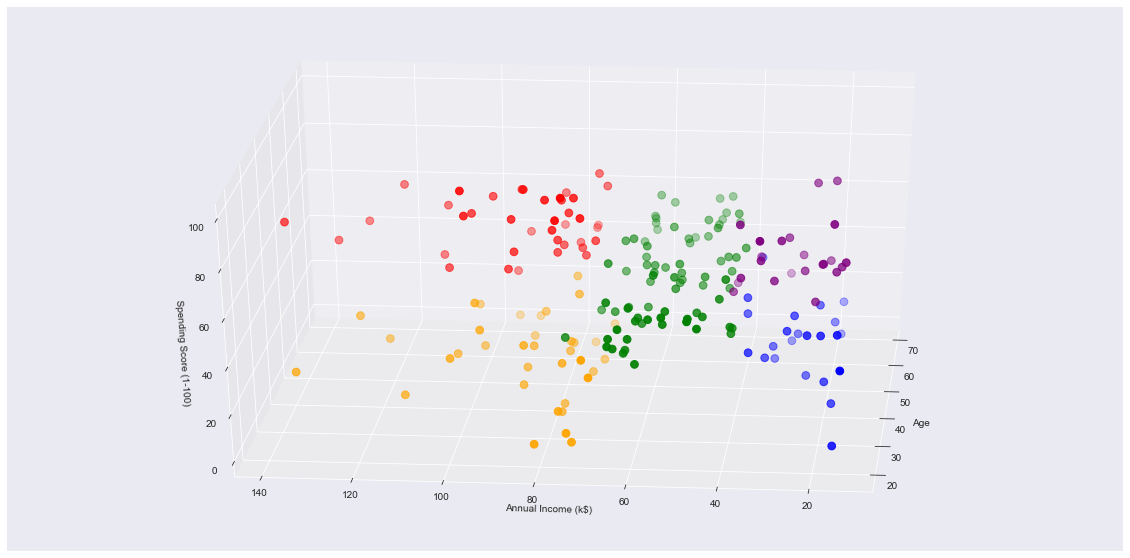

In [91]:
from mpl_toolkits.mplot3d import Axes3D

km = KMeans(n_clusters=5)
clusters = km.fit_predict(df)
df["label"] = clusters

#-------------------------------------------------------------------------------------------------------------------------------
#optional plotting to make you understand how the algorithm worked 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [89]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,19,15,39,4
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,2
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,3
197,1,32,126,74,1
198,1,32,137,18,3


## Conculusion :
- We get the labels ranging from 1 to 5 in our data frame. This makes our analyze segmentation of customers to get a better understanding of them which in turn could be used to increase the revenue of the company.